## Imports and constants

In [1]:
import snapshotsClass as ga
import Scripts as sc
import Graphs as gr
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import multiprocessing
import psutil
import time as ti
import operator
import math
from PIL import Image
import io
import numba as nb


num_of_total_snapshots = 400
h = 1

In [2]:
# print(os.path.abspath(os.getcwd()))
# print(multiprocessing.cpu_count())
out_put_location = '/efs/oldFSX/vc150_Rs3_Mdot7470_Rcirc10/output'
os.chdir(out_put_location)
# print(os.path.abspath(os.getcwd()))

## Constants relavent for analysis

In [3]:
r0 = 0.1
rN = 1e3
dr = 0.1
Zmin = -5
Zmax = 5
dz = 0.1
r = sc.rRange(r0,rN,dr) # in [kpc]
z = sc.zRange2(Zmin,Zmax,dz/10)

## Cell for analysis spherically or cylindrically but without splitting into bins in the Z axis

In [6]:
Ps = []
DPs = []
Ts = []
DTs = []
SFRs = []
Time = []
args = [(i,r0,rN,dr) for i in range(num_of_total_snapshots)]
if __name__ == '__main__':
    start_time = ti.time()
    with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
        results = pool.starmap(sc.spherical_P_and_T_SFRs, args)
        for aveP,DP,aveT,DT,SFR,time in results:
            Ps.append(aveP) # in [Pa]
            DPs.append(DP) # in [Pa]
            Ts.append(aveT)
            DTs.append(DT)
            SFRs.append(SFR) # in [Msun/yr]
            Time.append(time) # in [Gyrs]
        
        end_time = ti.time()
        print((end_time-start_time)/60)
        print("minutes long!")
        Ps = np.array(Ps)
        DPs = np.array(DPs)
        Ts = np.array(Ts)
        DTs = np.array(DTs)
        SFRs = np.array(SFRs)
        Time = np.array(Time)

Finished with snapshot number: 122
Finished with snapshot number: 120
Finished with snapshot number: 126
Finished with snapshot number: 116
Finished with snapshot number: 124
Finished with snapshot number: 104
Finished with snapshot number: 92
Finished with snapshot number: 98
Finished with snapshot number: 110
Finished with snapshot number: 118
Finished with snapshot number: 106
Finished with snapshot number: 112
Finished with snapshot number: 114
Finished with snapshot number: 96
Finished with snapshot number: 94
Finished with snapshot number: 108
Finished with snapshot number: 102
Finished with snapshot number: 88
Finished with snapshot number: 86
Finished with snapshot number: 72
Finished with snapshot number: 82
Finished with snapshot number: 100
Finished with snapshot number: 74
Finished with snapshot number: 78
Finished with snapshot number: 80
Finished with snapshot number: 70
Finished with snapshot number: 66
Finished with snapshot number: 84
Finished with snapshot number: 76


## Cell for analysis cylindrically with bins in the Z axis

In [19]:
Ps = []
DPs = []
Ts = []
DTs = []
snapPoints = []
SFRs = []
Time = []
args = [(i,r0,rN,dr,Zmin,Zmax,dz) for i in range(num_of_total_snapshots)]
# args = range(num_of_total_snapshots)
# print(*args)
if __name__ == '__main__':
    start_time = ti.time()
    with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
        results = pool.starmap(sc.cylindrical_P_and_T_SFRsWithZ_R, args)
        for aveP,DP,aveT,DT,points,SFR,time in results:
            Ps.append(aveP) # in [Pa]
            DPs.append(DP) # in [Pa]
            Ts.append(aveT)
            DTs.append(DT)
            snapPoints.append(points)
            SFRs.append(SFR) # in [Msun/yr]
            Time.append(time) # in [Gyrs]
        
        end_time = ti.time()
        print((end_time-start_time)/60)
        Ps = np.array(Ps,dtype='object')
        DPs = np.array(DPs,dtype='object')
        Ts = np.array(Ts,dtype='object')
        DTs = np.array(DTs,dtype='object')
        snapPoints = np.array(snapPoints,dtype='object')
        SFRs = np.array(SFRs)
        Time = np.array(Time)

TypeError: 'str' object is not callable

## Save

Since the analysis can take **a lot** of time its smart to save the analysis files. 
The name is informative of course. It contains the type of analysis and the parameters.
It can overwrite existing files so make sure to change "k" accordingly. 
The list is: **k=0**: "S" - Spherical, **k=1**: "C" - Cylindrical, **k=2**: "CZ" - Cylindrical with Z bins.

In [9]:
# string = "[r0,rN,dr,Zmin,Zmax,dz] CZ"
# S: "Spherical", C: "Cylindrical", CZ: "CylindricalWithZ"
cases = ["S","C","CZ"]
k = 0
if k == 0 or k==1 :
    string = "[r0=" + str(r0) + ", rN=" + str(rN) + ", dr=" + str(dr) + "," + '] ' + cases[k] 
    sc.save2(Ps,DPs,Ts,DTs,SFRs,Time,string)
else:
    string = "[r0=" + str(r0) + ", rN=" + str(rN) + ", dr=" + str(dr) + ", Zmin=" + str(Zmin) + ", Zmax=" + str(Zmax) + ", dz=" + str(dz) + '] ' + cases[k] 
    sc.save(Ps,DPs,Ts,DTs,snapPoints,SFRs,Time,string)

## Load

Choose the right "k" to load what you want

In [4]:
cases = ["S","C","CZ","CZR"]
k = 0
if k ==0 or k==1:
    string = "[r0=" + str(r0) + ", rN=" + str(rN) + ", dr=" + str(dr) + "," + '] ' + cases[k] 
    Ps,DPs,Ts,DTs,SFRs,Time = sc.load2(string)
else:
    string = "[r0=" + str(r0) + ", rN=" + str(rN) + ", dr=" + str(dr) + ", Zmin=" + str(Zmin) + ", Zmax=" + str(Zmax) + ", dz=" + str(dz) + '] ' + cases[k] 
    Ps,DPs,Ts,DTs,snapPoints,tSFRs,Time = sc.load(string)

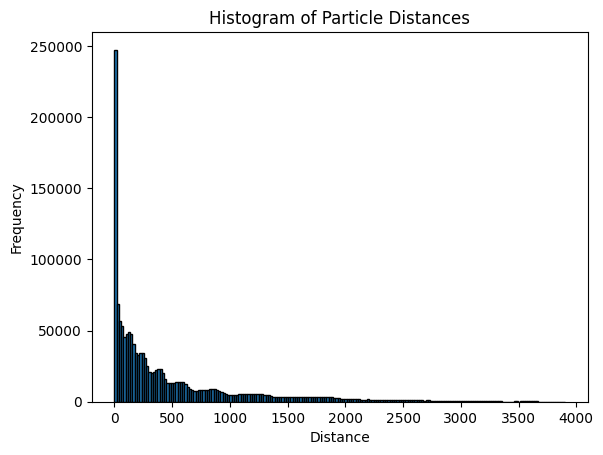

In [5]:
snp = ga.Snapshot(188)
distances = snp.sphericalRadiuses()
num_bins = 200
plt.hist(distances, bins=num_bins, edgecolor='black')

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Particle Distances')

# Show the chart
plt.show()

KeyboardInterrupt: 

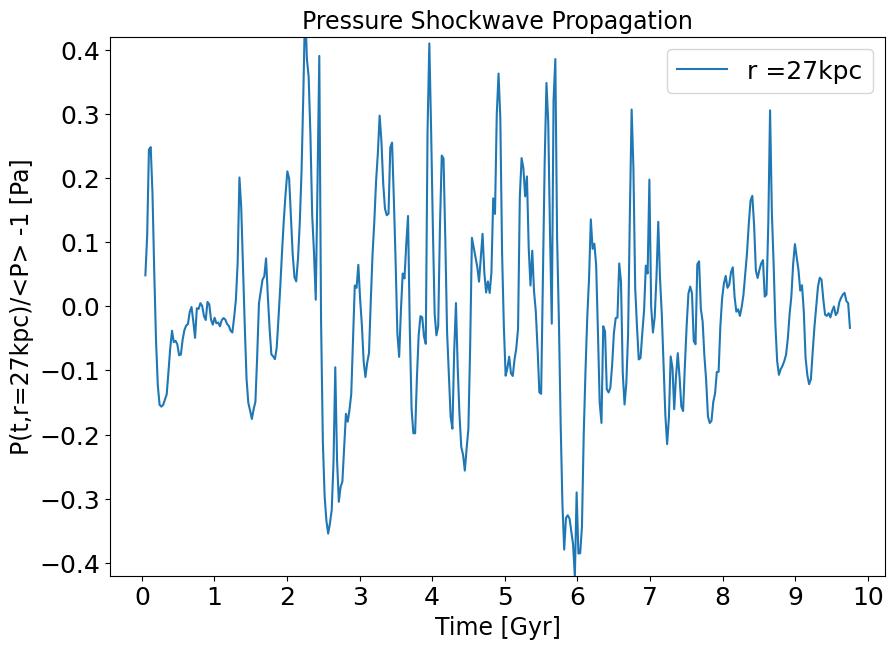

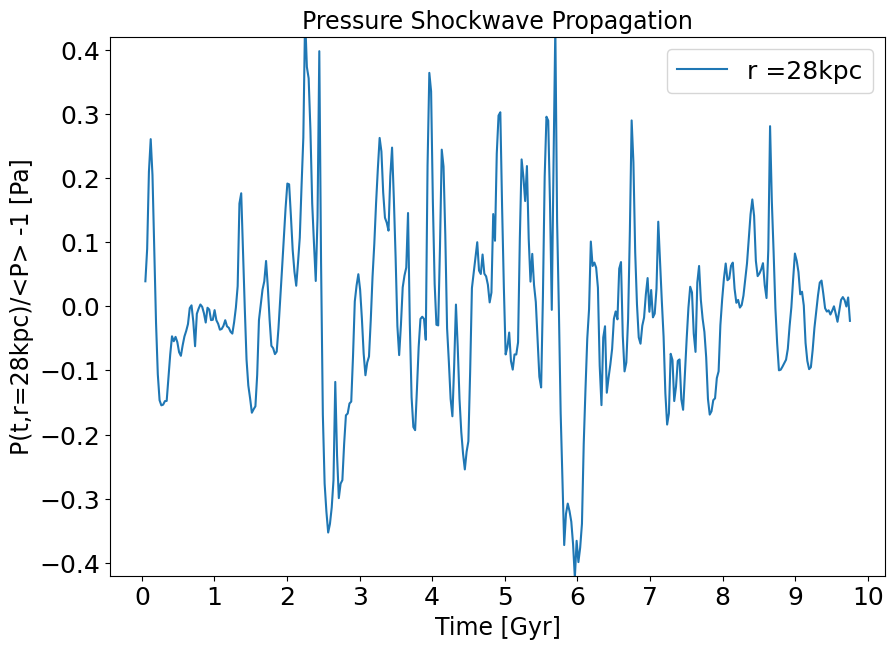

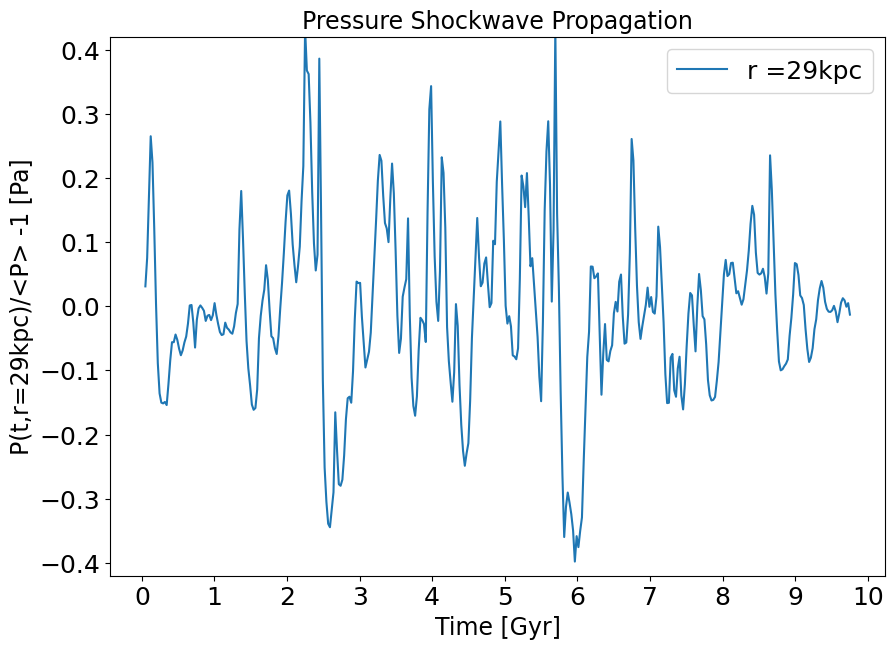

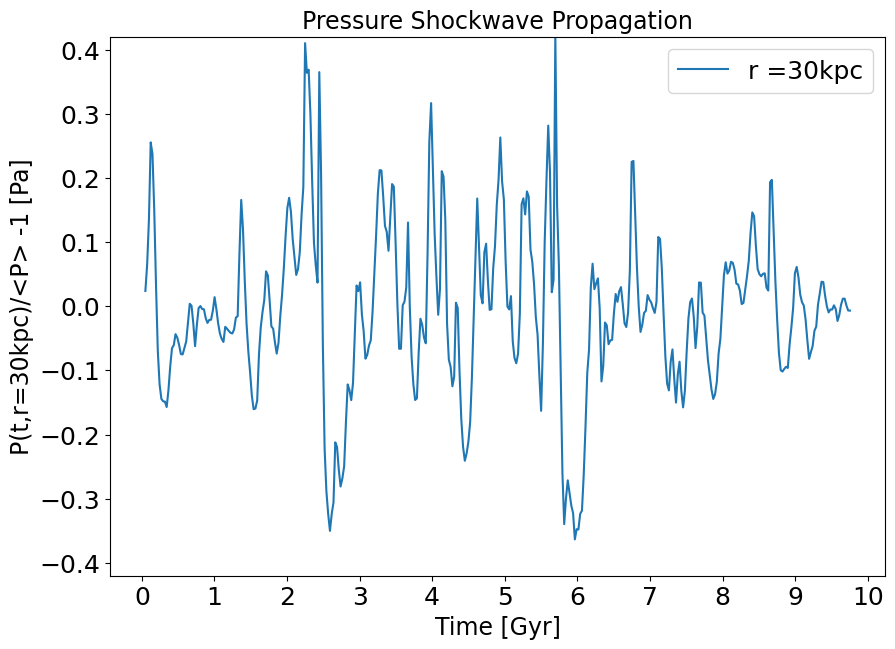

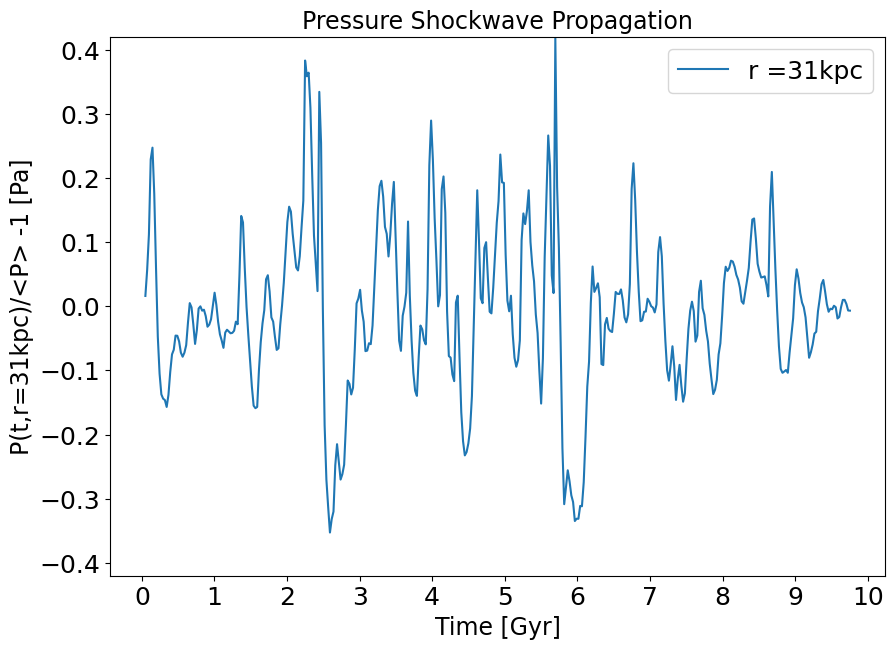

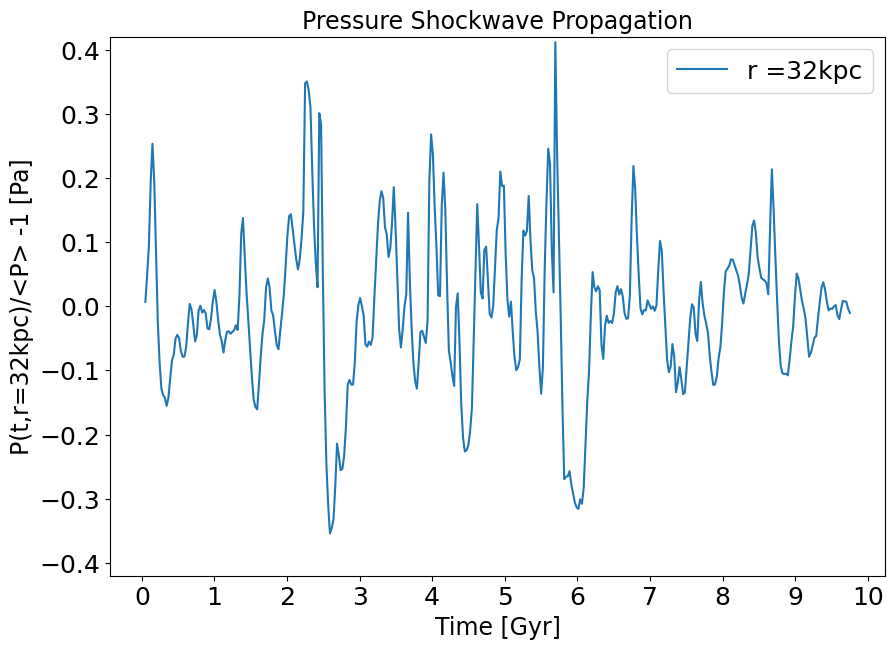

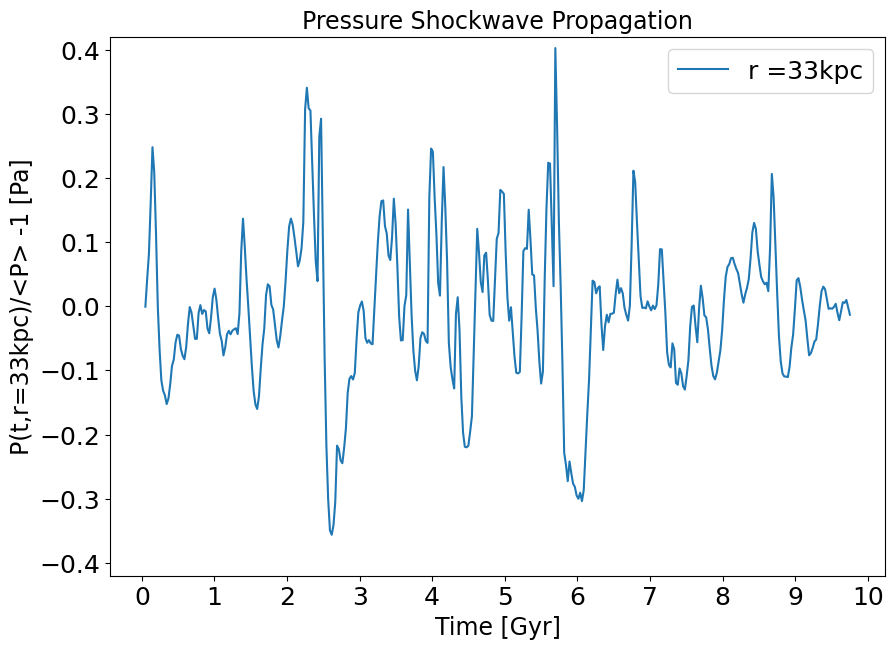

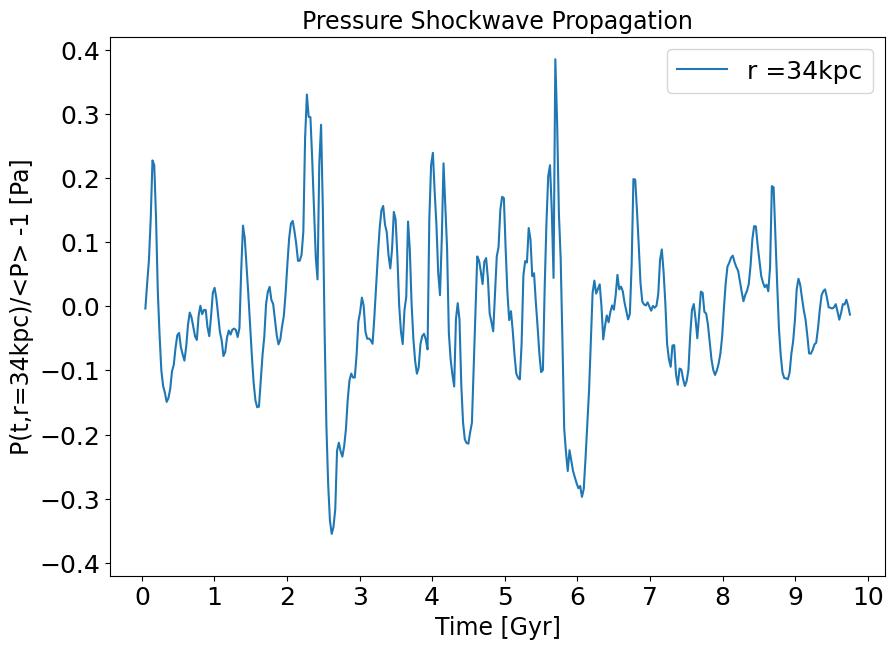

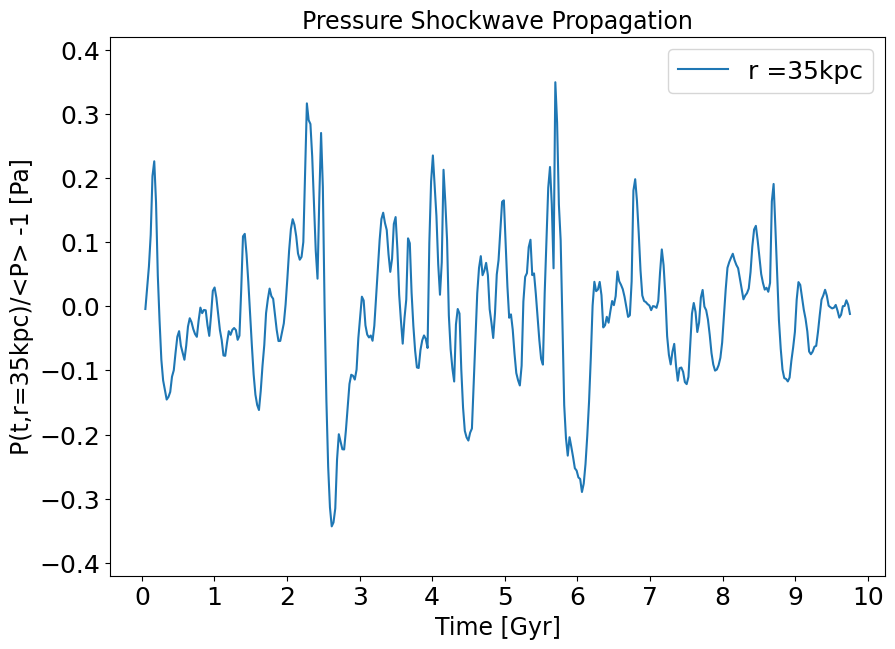

In [7]:
scale = 1
Rs = [i*scale for i in range(27,71)]
frames = []
im = Image.new('RGBA', (800, 600), (255, 255, 255, 255))
for R in Rs:
    log_P_of_t_at_r = sc.pressure_in_time_for_r(Ps,r,R)
    averagePressure = np.mean(np.power(10,log_P_of_t_at_r))
    log_P_of_t_at_r2 = np.concatenate([log_P_of_t_at_r[2:187],log_P_of_t_at_r[189:]])
    averagePressure2 = [np.mean(np.power(10,log_P_of_t_at_r2[i*4:40+i*4])) for i in range(int((len(log_P_of_t_at_r2)-len(log_P_of_t_at_r2)%4-40)/4))]
    tmp = [np.mean(np.power(10,log_P_of_t_at_r2[i*4:])) for i in range(int((len(log_P_of_t_at_r2)-len(log_P_of_t_at_r2)%4-40)/4),int((len(log_P_of_t_at_r2)-len(log_P_of_t_at_r2)%4)/4))]
    averagePressure2 += tmp
    averagePressure2 = np.array(averagePressure2)
    r2 = np.concatenate([r[2:187],r[189:]])
    Time2 = np.concatenate([Time[2:187],Time[189:]])
    fig,ax = plt.subplots(figsize =(10, 7));
    Norm_P_of_t_at_r2 = []
    for i in range(len(averagePressure2)):
        tmp = averagePressure2[i:i+1]
        Norm_P_of_t_at_r2.append(np.power(10,log_P_of_t_at_r2[i*4:i*4+4])/tmp)
    Norm_P_of_t_at_r2 = np.array(Norm_P_of_t_at_r2)
    Norm_P_of_t_at_r2 = Norm_P_of_t_at_r2.reshape(Norm_P_of_t_at_r2.shape[0]*4,)
    plt.plot(Time2,Norm_P_of_t_at_r2-1,label="r =" + str(R) + "kpc" );
    plt.title("Pressure Shockwave Propagation",fontsize=17);
    plt.xlabel("Time [Gyr]",fontsize=17);
    plt.xticks(np.arange(0,max(Time2)+1,1));
    ax.tick_params(axis='both', which='major', labelsize=18);
    plt.ylabel("P(t,r=" + str(R) + "kpc)/<P> -1 [Pa]",fontsize=17);
    plt.legend(fontsize = 18);
    plt.ylim([-0.42,0.42]);
    fig.savefig('temp.jpg')
    im = Image.open('temp.jpg')
    frames.append(im)
#     plt.show()
frames[0].save('Shock Wave propagation 27-70kpc LowRes.gif',format='GIF',append_images=frames[1:], save_all=True, duration=200, loop=0)

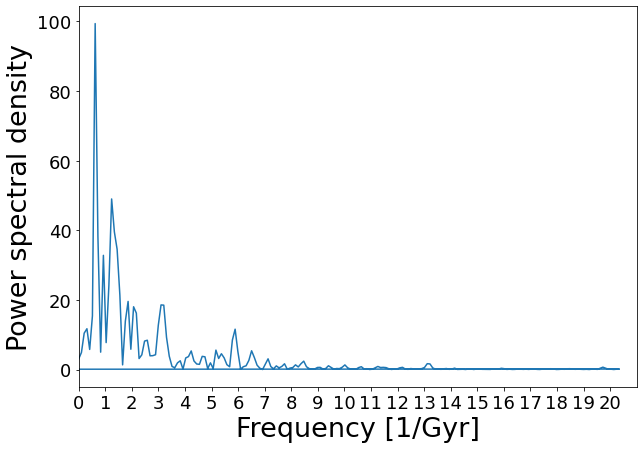

In [72]:
# y = log_P_of_t_at_r
y = Norm_P_of_t_at_r2-1
# y = (np.power(10,log_P_of_t_at_r2)/averagePressure2)
window = np.hamming(len(y))
y_windowed = y * window

fft = np.fft.fft(y_windowed)
psd = np.abs(fft)**2
freq = np.fft.fftfreq(len(y), d=Time[1]-Time[0])
fig,ax = plt.subplots(figsize =(10, 7))
plt.plot(freq, psd)
# print(psd)
# print(freq)
plt.xlabel('Frequency [1/Gyr]',fontsize=27)
plt.ylabel('Power spectral density',fontsize=27)
plt.xticks(np.arange(0,max(freq),1))
ax.tick_params(axis='both', which='major', labelsize=18)
# plt.axis([-10, 10, 0, 1e7])
plt.xlim(0,21)
plt.show()

## Average of pressure over time windows for each of the radii in the range

In [5]:
# setting the radius ranges and the resolution
radii_range = range(30, 300, 1)

# getting the normalized pressure over time with time windows
Norm_of_P_per_R_over_time = sc.averagePoverTimeWindows(Ps,r,radii_range,40,4)

# setting multicore creation of a gif
min_y = np.min(Norm_of_P_per_R_over_time-1)
max_y = np.max(Norm_of_P_per_R_over_time-1)/2
args = [(radii_range,Norm_of_P_per_R_over_time[j]-1,min_y,max_y,Time,j) for j in range(len(Norm_of_P_per_R_over_time))]
if __name__ == '__main__':
    start_time = ti.time()
    with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
        frames = pool.starmap(sc.multicore_gif, args)
        frames[0].save('Pressure Shock Wave propagation of radii range 30-300 kpc.gif',format='GIF',append_images=frames[1:], save_all=True, duration=100, loop=0);

finished with 16finished with 54
finished with 56
finished with 36finished with 38finished with 72
finished with 76finished with 112finished with 88



finished with 118finished with 106finished with 86finished with 4finished with 58finished with 100
finished with 114


finished with 10
finished with 26
finished with 22
finished with 24


finished with 14finished with 8finished with 12



finished with 34

finished with 94
finished with 64finished with 116finished with 42
finished with 104finished with 78finished with 2finished with 40finished with 0



finished with 30
finished with 44finished with 20
finished with 50finished with 102
finished with 6
finished with 120

finished with 32finished with 92finished with 124finished with 96

finished with 74finished with 82


finished with 18

finished with 48

finished with 84



finished with 90finished with 68
finished with 80
finished with 46finished with 110finished with 126finished with 70

finished with 108

finished with 60

finished

## Average pressure vs radii for different snapshots(times)

KeyboardInterrupt: 

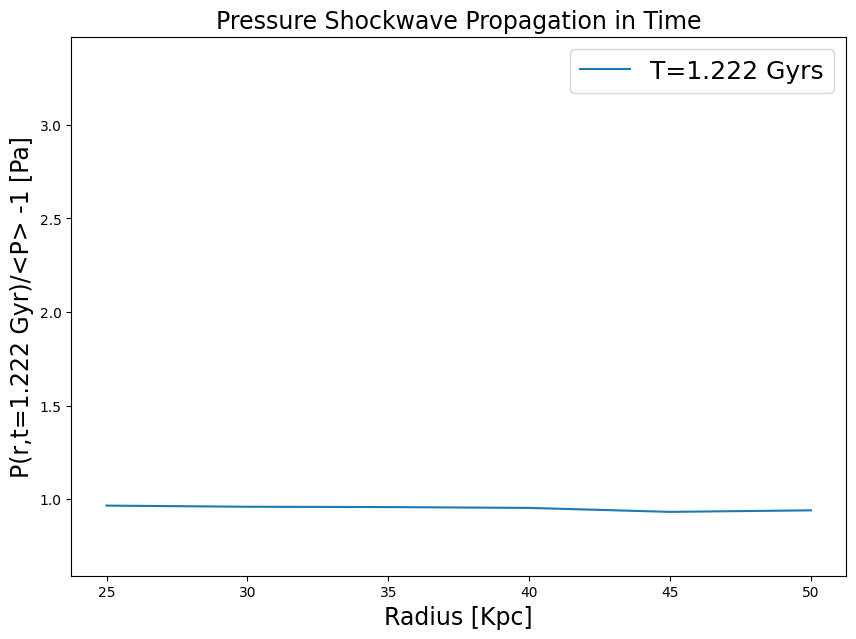

In [12]:
im = Image.new('RGBA', (800, 600), (255, 255, 255, 255))
frames = []
min_y = np.min(Norm_of_P_per_R_over_time-1)
max_y = np.max(Norm_of_P_per_R_over_time-1)/2

for j in range(len(Norm_of_P_per_R_over_time)):
    fig,ax = plt.subplots(figsize =(10, 7));
    plt.plot(radii_range,Norm_of_P_per_R_over_time[j],label="T=" + str(format(Time[j],".3f")) + " Gyrs");
    # plt.loglog(r[58:70],Ps[j][58:70],label="T=" + str(format(Time[j],".3f")));
    plt.title("Pressure Shockwave Propagation in Time",fontsize=17);
    plt.xlabel("Radius [Kpc]",fontsize=17);
    plt.ylabel("P(r,t=" + str(format(Time[j],".3f")) + " Gyr)/<P> -1 [Pa]",fontsize=17);
    plt.legend(fontsize = 18);
    plt.ylim(min_y,max_y);
    fig.savefig('temp.jpg');
    im = Image.open('temp.jpg');
    frames.append(im);
    plt.close()

# frames_images = [Image.open(frame) for frame in frames]
frames[0].save('Pressure Shock Wave propagation of radii range 25-50 kpc.gif',format='GIF',append_images=frames[1:], save_all=True, duration=100, loop=0);

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

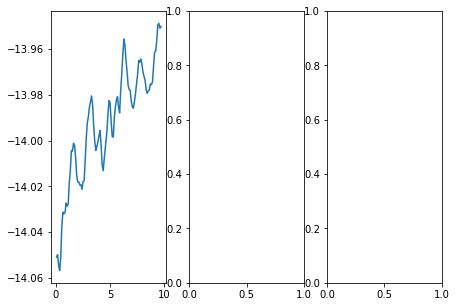

In [22]:
for i in range(len(radii_range)):
    fig,axes = plt.subplots(nrows=1,ncols=3,figsize =(7, 5))
    axes[0].plot(Time3,np.log10(ave_P_t_arr[i]))
    axes[0].title("Average pressure with 1Gyr window at r= " + str(radii_range[i]) + "kpc over time",fontsize=17)
    axes[0].xlabel("Time [Gyr]",fontsize=17)
    axes[0].xticks(np.arange(0,max(Time3)+1,1))
    axes[0].yticks(np.arange(min(np.log10(ave_P_t_arr[i])),max(np.log10(ave_P_t_arr[i])),0.02))
    axes[0].tick_params(axis='both', which='major', labelsize=18)
    axes[0].ylabel("<P>(t) [Pa]",fontsize=17)